In [1]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable


# Importing all require Libraries

In [2]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.metrics.pairwise import cosine_similarity

# Load Dataset.

In [3]:
df = pd.read_csv('D:\\HENIL\\Internship\\cloths-rating.csv')
df

,ProductID,UserID,Rating,Text
0,777,AV1YnR7wglJLPUi8IJmi,4,Great taffy at a great price.
1,767,AVpfpK8KLJeJML43BCuD,4,Absolutely wonderful - silky and sexy and comf...
2,1080,AVqkIdntQMlgsOJE6fuB,5,Love this dress! it's sooo pretty.
3,1077,AVpfpK8KLJeJML43BCuD,3,I had such high hopes for this dress and reall...
4,1049,AVpfpK8KLJeJML43BCuD,5,"I love, love, love this jumpsuit. it's fun, fl..."
...,...,...,...,...
629,823,B08GWV3SM6,1,I placed order 4+1 soaps.But I have received w...
630,823,B08GWV3SM6,3,"The soap is ok for bathing, no scent at all, m..."
631,847,B08GWV3SM6,5,For a long time I was searching for Indian soa...
632,910,AVph0EeEilAPnD_x9myq,3,Good but not great


In [4]:
df.shape

(634, 4)

In [5]:
df.describe()

,ProductID,Rating
count,634.000000,634.000000
mean,1681.768139,3.755521
std,2530.614810,1.603268
min,89.000000,0.000000
25%,697.000000,2.000000
50%,862.000000,5.000000
75%,1077.000000,5.000000
max,9696.000000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ProductID  634 non-null    int64 
 1   UserID     634 non-null    object
 2   Rating     634 non-null    int64 
 3   Text       634 non-null    object
dtypes: int64(2), object(2)
memory usage: 19.9+ KB


In [7]:
df.isnull().sum()

ProductID    0
UserID       0
Rating       0
Text         0
dtype: int64

# Find Sentiment score

In [8]:
def sentiment(text):
    try:
        return TextBlob(str(text)).sentiment.polarity
    except:
        return None
df['sentiment'] = df['Text'].apply(sentiment)
df    

,ProductID,UserID,Rating,Text,sentiment
0,777,AV1YnR7wglJLPUi8IJmi,4,Great taffy at a great price.,0.800000
1,767,AVpfpK8KLJeJML43BCuD,4,Absolutely wonderful - silky and sexy and comf...,0.633333
2,1080,AVqkIdntQMlgsOJE6fuB,5,Love this dress! it's sooo pretty.,0.437500
3,1077,AVpfpK8KLJeJML43BCuD,3,I had such high hopes for this dress and reall...,0.120000
4,1049,AVpfpK8KLJeJML43BCuD,5,"I love, love, love this jumpsuit. it's fun, fl...",0.550000
...,...,...,...,...,...
629,823,B08GWV3SM6,1,I placed order 4+1 soaps.But I have received w...,0.000000
630,823,B08GWV3SM6,3,"The soap is ok for bathing, no scent at all, m...",0.325000
631,847,B08GWV3SM6,5,For a long time I was searching for Indian soa...,-0.025000
632,910,AVph0EeEilAPnD_x9myq,3,Good but not great,0.150000


In [9]:
l = [-1,-.75,-.5,-.25,0,0.5,0.5,0.75,1]
d = []
for i in l:
    for j in range(1,6):
        x = i*j
        d.append(x)


print(d)


[-1, -2, -3, -4, -5, -0.75, -1.5, -2.25, -3.0, -3.75, -0.5, -1.0, -1.5, -2.0, -2.5, -0.25, -0.5, -0.75, -1.0, -1.25, 0, 0, 0, 0, 0, 0.5, 1.0, 1.5, 2.0, 2.5, 0.5, 1.0, 1.5, 2.0, 2.5, 0.75, 1.5, 2.25, 3.0, 3.75, 1, 2, 3, 4, 5]


In [10]:
df['Updated_score'] = df['Rating']*df['sentiment']
df

,ProductID,UserID,Rating,Text,sentiment,Updated_score
0,777,AV1YnR7wglJLPUi8IJmi,4,Great taffy at a great price.,0.800000,3.200000
1,767,AVpfpK8KLJeJML43BCuD,4,Absolutely wonderful - silky and sexy and comf...,0.633333,2.533333
2,1080,AVqkIdntQMlgsOJE6fuB,5,Love this dress! it's sooo pretty.,0.437500,2.187500
3,1077,AVpfpK8KLJeJML43BCuD,3,I had such high hopes for this dress and reall...,0.120000,0.360000
4,1049,AVpfpK8KLJeJML43BCuD,5,"I love, love, love this jumpsuit. it's fun, fl...",0.550000,2.750000
...,...,...,...,...,...,...
629,823,B08GWV3SM6,1,I placed order 4+1 soaps.But I have received w...,0.000000,0.000000
630,823,B08GWV3SM6,3,"The soap is ok for bathing, no scent at all, m...",0.325000,0.975000
631,847,B08GWV3SM6,5,For a long time I was searching for Indian soa...,-0.025000,-0.125000
632,910,AVph0EeEilAPnD_x9myq,3,Good but not great,0.150000,0.450000


In [11]:
len(d)

45

In [12]:
d.sort()
print(d)

[-5, -4, -3.75, -3, -3.0, -2.5, -2.25, -2, -2.0, -1.5, -1.5, -1.25, -1, -1.0, -1.0, -0.75, -0.75, -0.5, -0.5, -0.25, 0, 0, 0, 0, 0, 0.5, 0.5, 0.75, 1.0, 1.0, 1, 1.5, 1.5, 1.5, 2.0, 2.0, 2, 2.25, 2.5, 2.5, 3.0, 3, 3.75, 4, 5]


In [13]:
df1 = pd.DataFrame({'A' :d})
a = df1['A'].unique() 
print(a)

[-5.   -4.   -3.75 -3.   -2.5  -2.25 -2.   -1.5  -1.25 -1.   -0.75 -0.5
 -0.25  0.    0.5   0.75  1.    1.5   2.    2.25  2.5   3.    3.75  4.
  5.  ]


In [14]:
len(a)

25

# Find New Rating according to range

In [15]:
def classify_scores(a):
    if a <=-0.25:
        v=1
    elif a <=1:
        v=2
    elif a <=2:
        v=3
    elif a <=3:
        v=4
    elif a <=5:
        v=5
    return v

df['New_score'] = df['Updated_score'].apply(classify_scores)
df

,ProductID,UserID,Rating,Text,sentiment,Updated_score,New_score
0,777,AV1YnR7wglJLPUi8IJmi,4,Great taffy at a great price.,0.800000,3.200000,5
1,767,AVpfpK8KLJeJML43BCuD,4,Absolutely wonderful - silky and sexy and comf...,0.633333,2.533333,4
2,1080,AVqkIdntQMlgsOJE6fuB,5,Love this dress! it's sooo pretty.,0.437500,2.187500,4
3,1077,AVpfpK8KLJeJML43BCuD,3,I had such high hopes for this dress and reall...,0.120000,0.360000,2
4,1049,AVpfpK8KLJeJML43BCuD,5,"I love, love, love this jumpsuit. it's fun, fl...",0.550000,2.750000,4
...,...,...,...,...,...,...,...
629,823,B08GWV3SM6,1,I placed order 4+1 soaps.But I have received w...,0.000000,0.000000,2
630,823,B08GWV3SM6,3,"The soap is ok for bathing, no scent at all, m...",0.325000,0.975000,2
631,847,B08GWV3SM6,5,For a long time I was searching for Indian soa...,-0.025000,-0.125000,2
632,910,AVph0EeEilAPnD_x9myq,3,Good but not great,0.150000,0.450000,2


# Label encoding of productid and User Id

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['UserID'] = le.fit_transform(df['UserID'])
df

,ProductID,UserID,Rating,Text,sentiment,Updated_score,New_score
0,777,0,4,Great taffy at a great price.,0.800000,3.200000,5
1,767,3,4,Absolutely wonderful - silky and sexy and comf...,0.633333,2.533333,4
2,1080,13,5,Love this dress! it's sooo pretty.,0.437500,2.187500,4
3,1077,3,3,I had such high hopes for this dress and reall...,0.120000,0.360000,2
4,1049,3,5,"I love, love, love this jumpsuit. it's fun, fl...",0.550000,2.750000,4
...,...,...,...,...,...,...,...
629,823,41,1,I placed order 4+1 soaps.But I have received w...,0.000000,0.000000,2
630,823,41,3,"The soap is ok for bathing, no scent at all, m...",0.325000,0.975000,2
631,847,41,5,For a long time I was searching for Indian soa...,-0.025000,-0.125000,2
632,910,7,3,Good but not great,0.150000,0.450000,2


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['ProductID'] = le.fit_transform(df['ProductID'])
df

,ProductID,UserID,Rating,Text,sentiment,Updated_score,New_score
0,7,0,4,Great taffy at a great price.,0.800000,3.200000,5
1,6,3,4,Absolutely wonderful - silky and sexy and comf...,0.633333,2.533333,4
2,21,13,5,Love this dress! it's sooo pretty.,0.437500,2.187500,4
3,20,3,3,I had such high hopes for this dress and reall...,0.120000,0.360000,2
4,17,3,5,"I love, love, love this jumpsuit. it's fun, fl...",0.550000,2.750000,4
...,...,...,...,...,...,...,...
629,8,41,1,I placed order 4+1 soaps.But I have received w...,0.000000,0.000000,2
630,8,41,3,"The soap is ok for bathing, no scent at all, m...",0.325000,0.975000,2
631,9,41,5,For a long time I was searching for Indian soa...,-0.025000,-0.125000,2
632,13,7,3,Good but not great,0.150000,0.450000,2


In [18]:
df.describe()

,ProductID,UserID,Rating,sentiment,Updated_score,New_score
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,12.899054,19.561514,3.755521,0.297970,1.468872,3.000000
std,8.002916,11.736449,1.603268,0.380942,1.591681,1.286704
min,0.000000,0.000000,0.000000,-1.000000,-3.750000,1.000000
25%,5.000000,9.250000,2.000000,0.000000,0.000000,2.000000
50%,12.000000,18.000000,5.000000,0.325000,1.303646,3.000000
75%,20.000000,30.000000,5.000000,0.600000,2.739014,4.000000
max,26.000000,41.000000,5.000000,1.000000,5.000000,5.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ProductID      634 non-null    int64  
 1   UserID         634 non-null    int32  
 2   Rating         634 non-null    int64  
 3   Text           634 non-null    object 
 4   sentiment      634 non-null    float64
 5   Updated_score  634 non-null    float64
 6   New_score      634 non-null    int64  
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 32.3+ KB


# Pivot table

In [20]:
df_pivot = df.pivot_table(index = 'ProductID', columns = 'UserID',values = 'New_score').fillna(0)
df_pivot

UserID,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
ProductID,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.000000,0.000000,3.0,0.0,0.0,5.0,2.000000,2.000000,0.0,...,0.000000,3.00,0.0,0.0,0.000000,4.000000,0.000000,0.000000,0.000000,3.75
1,0.0,3.000000,0.000000,0.0,0.0,4.0,0.0,0.000000,4.333333,1.5,...,0.000000,1.00,3.0,0.0,0.000000,2.250000,0.000000,0.000000,0.000000,0.00
2,5.0,2.000000,0.000000,3.0,0.0,4.0,5.0,3.000000,0.000000,0.0,...,0.000000,0.00,0.0,0.0,0.000000,0.000000,1.333333,0.000000,5.000000,0.00
3,2.0,2.000000,0.000000,0.0,2.0,0.0,4.0,5.000000,2.000000,0.0,...,3.000000,0.00,3.5,0.0,0.000000,2.666667,0.000000,0.000000,3.666667,0.00
4,0.0,0.000000,4.000000,4.0,2.0,0.0,2.0,3.000000,2.000000,0.0,...,3.500000,0.00,4.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.00
5,0.0,2.000000,2.000000,0.0,0.0,0.0,5.0,0.000000,2.000000,2.0,...,4.000000,3.00,4.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.00
6,2.0,0.000000,0.000000,4.0,0.0,0.0,2.0,0.000000,0.000000,0.0,...,0.000000,2.00,0.0,0.0,3.000000,0.000000,2.000000,1.000000,0.000000,0.00
7,5.0,0.000000,0.000000,0.0,0.0,0.0,2.0,0.000000,0.000000,2.0,...,0.000000,1.00,0.0,0.0,0.000000,0.000000,5.000000,0.000000,0.000000,0.00
8,0.0,0.000000,0.000000,5.0,0.0,0.0,5.0,1.000000,0.000000,0.0,...,0.000000,5.00,0.0,0.0,0.000000,5.000000,0.000000,0.000000,0.000000,2.00


# Sparse Matrix(compressed sparse)

In [21]:
from scipy.sparse import csr_matrix

df_pivot_matrix = csr_matrix(df_pivot.values)
print(df_pivot_matrix)

#(raw,column) value(rating) 

  (0, 3)	3.0
  (0, 6)	5.0
  (0, 7)	2.0
  (0, 8)	2.0
  (0, 11)	4.0
  (0, 16)	3.5
  (0, 18)	3.4
  (0, 20)	2.0
  (0, 22)	5.0
  (0, 28)	4.0
  (0, 33)	3.0
  (0, 37)	4.0
  (0, 41)	3.75
  (1, 1)	3.0
  (1, 5)	4.0
  (1, 8)	4.333333333333333
  (1, 9)	1.5
  (1, 10)	2.0
  (1, 13)	2.6666666666666665
  (1, 17)	2.0
  (1, 22)	5.0
  (1, 25)	2.0
  (1, 29)	3.0
  (1, 33)	1.0
  (1, 34)	3.0
  :	:
  (25, 17)	4.5
  (25, 21)	2.0
  (25, 22)	2.0
  (25, 25)	2.6666666666666665
  (25, 30)	4.0
  (25, 38)	3.0
  (25, 40)	1.6666666666666667
  (26, 0)	2.0
  (26, 1)	3.0
  (26, 3)	3.0
  (26, 6)	2.0
  (26, 7)	3.5
  (26, 8)	2.0
  (26, 9)	2.0
  (26, 11)	3.0
  (26, 16)	3.0
  (26, 17)	2.2
  (26, 18)	3.0
  (26, 19)	1.0
  (26, 22)	2.0
  (26, 23)	2.0
  (26, 25)	4.0
  (26, 28)	3.0
  (26, 33)	3.25
  (26, 37)	2.25


# Find Cosine simlarity

In [22]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', n_neighbors = 20, radius = 1)
model_knn.fit(df_pivot_matrix)

NearestNeighbors(metric='cosine', n_neighbors=20, radius=1)

In [23]:
similarity_matrix = cosine_similarity(df_pivot)
similarity_matrix

array([[1.        , 0.33180003, 0.34731885, 0.39380839, 0.54676023,
        0.41816981, 0.29605353, 0.31227489, 0.78846991, 0.35071361,
        0.16990336, 0.3141411 , 0.54150012, 0.44640812, 0.26513706,
        0.08735731, 0.27681686, 0.10227159, 0.19342442, 0.09882579,
        0.3852686 , 0.36294349, 0.18041067, 0.        , 0.52433909,
        0.17769639, 0.71075896],
       [0.33180003, 1.        , 0.4317589 , 0.29088282, 0.19310629,
        0.44027757, 0.17970091, 0.03840277, 0.24562995, 0.26150968,
        0.12734076, 0.2106256 , 0.39948681, 0.47368644, 0.39699107,
        0.25267484, 0.16365961, 0.12325556, 0.37357534, 0.        ,
        0.25313087, 0.20203635, 0.18434039, 0.        , 0.39145634,
        0.37185258, 0.42543225],
       [0.34731885, 0.4317589 , 1.        , 0.41152506, 0.20979493,
        0.35668523, 0.53740406, 0.41814325, 0.38282082, 0.37308693,
        0.16638389, 0.23113097, 0.33222111, 0.26840271, 0.26285977,
        0.37745334, 0.10029936, 0.37370127, 0.3107

# Pie Chart 

In [24]:
def sentimenttostring(value):
    if value>0:
        x = 'positive'
    elif value<0:
        x = 'negative'
    else:
        x = 'neutral'
    return x
df['sentiment_string'] = df['sentiment'].apply(sentimenttostring)
df

,ProductID,UserID,Rating,Text,sentiment,Updated_score,New_score,sentiment_string
0,7,0,4,Great taffy at a great price.,0.800000,3.200000,5,positive
1,6,3,4,Absolutely wonderful - silky and sexy and comf...,0.633333,2.533333,4,positive
2,21,13,5,Love this dress! it's sooo pretty.,0.437500,2.187500,4,positive
3,20,3,3,I had such high hopes for this dress and reall...,0.120000,0.360000,2,positive
4,17,3,5,"I love, love, love this jumpsuit. it's fun, fl...",0.550000,2.750000,4,positive
...,...,...,...,...,...,...,...,...
629,8,41,1,I placed order 4+1 soaps.But I have received w...,0.000000,0.000000,2,neutral
630,8,41,3,"The soap is ok for bathing, no scent at all, m...",0.325000,0.975000,2,positive
631,9,41,5,For a long time I was searching for Indian soa...,-0.025000,-0.125000,2,negative
632,13,7,3,Good but not great,0.150000,0.450000,2,positive


In [25]:
df['sentiment_string'].value_counts()

positive    451
negative     98
neutral      85
Name: sentiment_string, dtype: int64

In [26]:
from matplotlib import pyplot as plt

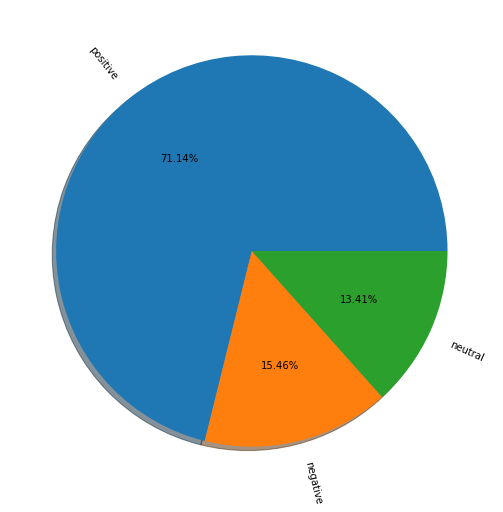

In [27]:
plt.figure(figsize=(16,9))
plt.pie(df['sentiment_string'].value_counts(),
        labels=df['sentiment_string'].value_counts().index.tolist(),
        shadow=True,
        rotatelabels=True,
        autopct='%.2f%%')
plt.show()

# Build a model 

In [28]:
product_ID = int(input('Enter Product ID according to data set : '))
data = list(df_pivot.index) #shows list of ProductID in data-set
print(data)

Enter Product ID according to data set : 12
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [29]:
query_index = data.index(product_ID) #shows index of productID by USER
print(query_index)

12


In [30]:
similarity, indices = model_knn.kneighbors(df_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 8)
print(similarity) #shows similarity distance through productID by USER
print(indices) #shows indexs of productID by USER

[[2.22044605e-16 2.09860899e-01 3.64903255e-01 3.77397441e-01
  3.92394095e-01 4.26857517e-01 4.28055098e-01 4.37231388e-01]]
[[12 13 26  3 14  4 18  8]]


In [31]:
i=df_pivot.index[indices.flatten()]
i

Int64Index([12, 13, 26, 3, 14, 4, 18, 8], dtype='int64', name='ProductID')

In [32]:
d=similarity.flatten()
d

array([2.22044605e-16, 2.09860899e-01, 3.64903255e-01, 3.77397441e-01,
       3.92394095e-01, 4.26857517e-01, 4.28055098e-01, 4.37231388e-01])

In [33]:
new=list(zip(i,d))
new

[(12, 2.220446049250313e-16),
 (13, 0.20986089921154838),
 (26, 0.36490325484092956),
 (3, 0.37739744147576604),
 (14, 0.3923940953532875),
 (4, 0.42685751664500415),
 (18, 0.42805509805326014),
 (8, 0.43723138781765436)]

In [34]:
pd.DataFrame(new)

,0,1
0,12,2.220446e-16
1,13,2.098609e-01
2,26,3.649033e-01
3,3,3.773974e-01
4,14,3.923941e-01
5,4,4.268575e-01
6,18,4.280551e-01
7,8,4.372314e-01


In [35]:
data_dict={}
for i in range(0, len(similarity.flatten())):   

    if i == 0:
        print('Recommendations for {0}:\n'.format(df_pivot.index[query_index]))
    else:
        data_dict[str(df_pivot.index[indices.flatten()[i]])] = float(similarity.flatten()[i])
        print(f'{df_pivot.index[indices.flatten()[i]]}, is similarity distance = with {similarity.flatten()[i]:.20f}:')

print(data_dict)

Recommendations for 12:

13, is similarity distance = with 0.20986089921154837956:
26, is similarity distance = with 0.36490325484092955843:
3, is similarity distance = with 0.37739744147576603783:
14, is similarity distance = with 0.39239409535328750867:
4, is similarity distance = with 0.42685751664500415359:
18, is similarity distance = with 0.42805509805326014128:
8, is similarity distance = with 0.43723138781765436001:
{'13': 0.20986089921154838, '26': 0.36490325484092956, '3': 0.37739744147576604, '14': 0.3923940953532875, '4': 0.42685751664500415, '18': 0.42805509805326014, '8': 0.43723138781765436}


# Similarity distance of every similar product based on product ID.

In [36]:
new_df = pd.DataFrame(new, columns=['Product ID', 'Distance'])
new_df = new_df.iloc[1:]
new_df

,Product ID,Distance
1,13,0.209861
2,26,0.364903
3,3,0.377397
4,14,0.392394
5,4,0.426858
6,18,0.428055
7,8,0.437231
